## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout, BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2, 0.3]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout in itertools.product(Dropout_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout_EXP = %.6f" % (dropout))

    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout[0])
    model.summary()
    optimizer = keras.optimizers.Adam()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-dropout-%s" % (str(dropout))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout_EXP = 0.200000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________

Epoch 40/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3236 - acc: 0.5260 - val_loss: 1.3499 - val_acc: 0.5126
Epoch 41/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3191 - acc: 0.5272 - val_loss: 1.3485 - val_acc: 0.5172
Epoch 42/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3148 - acc: 0.5292 - val_loss: 1.3413 - val_acc: 0.5187
Epoch 43/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3127 - acc: 0.5295 - val_loss: 1.3632 - val_acc: 0.5134
Epoch 44/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3022 - acc: 0.5319 - val_loss: 1.3602 - val_acc: 0.5141
Epoch 45/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3048 - acc: 0.5351 - val_loss: 1.3831 - val_acc: 0.5024
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2991 - acc: 0.5352 - val_loss: 1.3352 - val_acc: 0.5180
Epoch 47/50
50000/50000 [=========

Epoch 36/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4985 - acc: 0.4635 - val_loss: 1.4491 - val_acc: 0.4889
Epoch 37/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4904 - acc: 0.4660 - val_loss: 1.4431 - val_acc: 0.4811
Epoch 38/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4842 - acc: 0.4668 - val_loss: 1.4423 - val_acc: 0.4872
Epoch 39/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4813 - acc: 0.4686 - val_loss: 1.4081 - val_acc: 0.4949
Epoch 40/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4772 - acc: 0.4693 - val_loss: 1.4307 - val_acc: 0.4888
Epoch 41/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4766 - acc: 0.4695 - val_loss: 1.4110 - val_acc: 0.4970
Epoch 42/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4606 - acc: 0.4747 - val_loss: 1.4135 - val_acc: 0.4921
Epoch 43/50
50000/50000 [=========

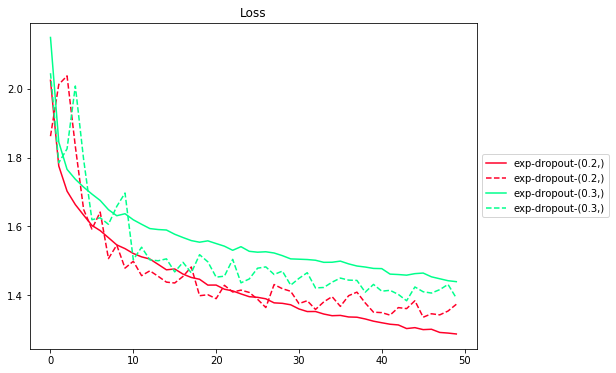

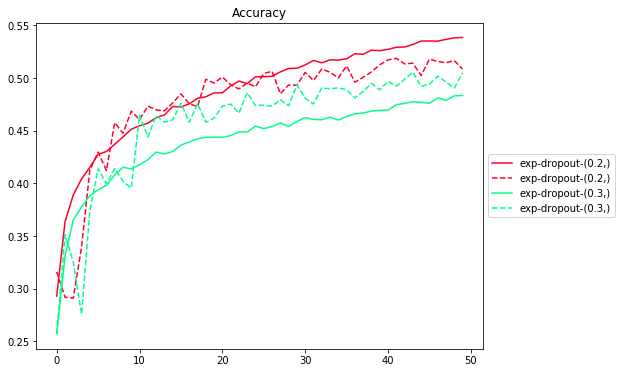

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()